In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/Shareddrives/My\ paper

/content/drive/Shareddrives/My paper


In [ ]:
import math
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from collections import Counter
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Import the Keras libraries and packages
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, LSTM, Dropout, TimeDistributed, Embedding, Input
from tensorflow.keras.optimizers import RMSprop, Adam, SGD
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import regularizers
from keras import backend as K

In [ ]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_tree
from sklearn.model_selection import GridSearchCV

In [ ]:
from imblearn.under_sampling import NearMiss

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix,classification_report, roc_curve
from scipy.stats import spearmanr

In [ ]:
event_data = pd.read_csv('./Customer Value Prediction/TABLES/Session Behaviors Count.csv')

In [ ]:
feature_data = pd.read_csv('./Customer Value Prediction/TABLES/Handcrafted Features.csv')

In [ ]:
event_data.columns

Index(['MemberID', 'SessionOrder', 'add', 'checkout', 'purchase', 'register',
       'search', 'traffic', 'viewactivity', 'viewcategory', 'viewmainpage',
       'viewproduct', 'TimeDiff', 'TotalTime', 'uid_filled',
       'TotalSalesAmount', 'Active', 'VIP'],
      dtype='object')

In [ ]:
feature_data.columns

Index(['MemberID', 'Age', 'Lifespan', 'Lifespan_days', 'Recency', 'Frequency',
       'Monetary', 'Monetary_total', 'CAI', 'ActiveDays', 'CompleteOrders',
       'ReturnOrders', 'PromotionUsed', 'PromotionUsedRate', 'FinishedOrders',
       'ReturnRate', 'PurchaseRatio', 'TotalSalesAmount', 'Active', 'VIP'],
      dtype='object')

In [ ]:
print(len(event_data), len(feature_data))

700513 83931


## 處理 Event data -> Normalize

In [ ]:
event_cols = ['add', 'checkout', 'purchase', 'register', 'search', 'traffic', 'viewactivity',
       'viewcategory', 'viewmainpage', 'viewproduct' , 'TimeDiff', 'TotalTime']

In [ ]:
def normalize(data, scaler):
  df = data.copy()
  norm_df = df.copy()[['MemberID']]
  scaled_df = pd.DataFrame(scaler.fit_transform(df[event_cols].values.reshape(-1,12)), columns=event_cols)
  norm_df = pd.concat([norm_df, scaled_df], axis=1)
  
  return norm_df

In [ ]:
event_data.describe()

SessionOrder            add       checkout       purchase  \
count  7.005130e+05  700513.000000  700513.000000  700513.000000   
mean   2.318815e+06       0.166998       0.098234       0.055479   
std    1.335184e+06       0.837909       0.635376       0.343568   
min    7.400000e+01       0.000000       0.000000       0.000000   
25%    1.165879e+06       0.000000       0.000000       0.000000   
50%    2.325449e+06       0.000000       0.000000       0.000000   
75%    3.482036e+06       0.000000       0.000000       0.000000   
max    4.610624e+06      81.000000      62.000000      16.000000   

            register         search        traffic   viewactivity  \
count  700513.000000  700513.000000  700513.000000  700513.000000   
mean        0.012821       0.062353       0.402852       0.036750   
std         0.141419       0.391526       0.490472       0.373704   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       1.000000       0.000000   
max        41.000000      47.000000       1.000000      38.000000   

        viewcategory   viewmainpage    viewproduct       TimeDiff  \
count  700513.000000  700513.000000  700513.000000  700513.000000   
mean        1.205088       1.284503       1.558018   13576.392959   
std         3.212392       2.095138       4.266150   37707.913370   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       1.000000       0.000000     701.000000   
75%         1.000000       2.000000       1.000000    7369.000000   
max       182.000000     995.000000     247.000000  520331.000000   

           TotalTime  TotalSalesAmount         Active            VIP  
count  700513.000000     700513.000000  700513.000000  700513.000000  
mean        1.747105       1377.119483       0.293521       0.161799  
std         5.631009       4220.274239       0.455375       0.368266  
min         0.000000      -1680.000000       0.000000       0.000000  
25%         0.000000          0.000000       0.000000       0.000000  
50%         0.000000          0.000000       0.000000       0.000000  
75%         1.000000       1380.000000       1.000000       0.000000  
max       190.000000     181428.000000       1.000000       1.000000

In [ ]:
scaler = MinMaxScaler()
data_scaled = normalize(event_data, scaler)

In [ ]:
data_scaled.describe()

add       checkout       purchase       register  \
count  700513.000000  700513.000000  700513.000000  700513.000000   
mean        0.002062       0.001584       0.003467       0.000313   
std         0.010345       0.010248       0.021473       0.003449   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

              search        traffic   viewactivity   viewcategory  \
count  700513.000000  700513.000000  700513.000000  700513.000000   
mean        0.001327       0.402852       0.000967       0.006621   
std         0.008330       0.490472       0.009834       0.017651   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       1.000000       0.000000       0.005495   
max         1.000000       1.000000       1.000000       1.000000   

        viewmainpage    viewproduct       TimeDiff      TotalTime  
count  700513.000000  700513.000000  700513.000000  700513.000000  
mean        0.001291       0.006308       0.026092       0.009195  
std         0.002106       0.017272       0.072469       0.029637  
min         0.000000       0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000       0.000000  
50%         0.001005       0.000000       0.001347       0.000000  
75%         0.002010       0.004049       0.014162       0.005263  
max         1.000000       1.000000       1.000000       1.000000

## 整理 event data X

In [ ]:
g = data_scaled.groupby('MemberID').cumcount()
s = 12 - data_scaled.groupby('MemberID').size()

In [ ]:
index_df = pd.merge(pd.concat([data_scaled[['MemberID']],pd.DataFrame(g, columns=['count'])[['count']]],axis=1), pd.DataFrame(s, columns=['size'])['size'], on='MemberID')

In [ ]:
index_df['new_index'] = index_df['count'] + index_df['size']

In [ ]:
mux = pd.MultiIndex.from_product([data_scaled['MemberID'].unique(), g.unique()])
event_X = np.array(data_scaled.set_index(['MemberID',index_df['new_index']])
       .reindex(mux, fill_value=0)
       .groupby(level=0)[event_cols]
       .apply(lambda x: x.values.tolist())
       .tolist())

In [ ]:
event_X.shape

(83931, 12, 12)

In [ ]:
event_data_unified = pd.DataFrame(event_X.reshape(len(event_X), 12*12))

In [ ]:
event_data_unified.head()

0    1    2    3    4    5    6         7         8         9    ...  \
0  0.000000  0.0  0.0  0.0  0.0  1.0  0.0  0.000000  0.000000  0.000000  ...   
1  0.000000  0.0  0.0  0.0  0.0  1.0  0.0  0.005495  0.000000  0.000000  ...   
2  0.024691  0.0  0.0  0.0  0.0  0.0  0.0  0.071429  0.001005  0.097166  ...   
3  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000  ...   
4  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.021978  0.004020  0.032389  ...   

   134  135  136  137  138       139       140       141       142       143  
0  0.0  0.0  0.0  0.0  0.0  0.005495  0.002010  0.000000  0.029352  0.005263  
1  0.0  0.0  0.0  0.0  0.0  0.000000  0.001005  0.000000  0.009346  0.000000  
2  0.0  0.0  0.0  0.0  0.0  0.000000  0.002010  0.016194  0.036475  0.005263  
3  0.0  0.0  0.0  0.0  0.0  0.005495  0.000000  0.000000  0.000919  0.000000  
4  0.0  0.0  0.0  0.0  0.0  0.109890  0.003015  0.060729  0.001149  0.015789  

[5 rows x 144 columns]

## 處理 feature data

In [ ]:
# feature columns
uds_cols = ['Lifespan_days', 'CAI', 'Monetary', 'Recency', 'Frequency', 'ActiveDays', 'PromotionUsedRate', 'CompleteOrders', 'ReturnRate', 'TotalSalesAmount', 'Active', 'VIP']

In [ ]:
feature_data_uds = feature_data[uds_cols]

In [ ]:
feature_data_uds.head()

Lifespan_days       CAI  Monetary  Recency  Frequency  ActiveDays  \
0           1517  0.138333    840.00      123        2.0        16.0   
1           1225  0.090855   2212.25        8        4.0        50.0   
2           1414 -0.186684      0.00     1035        0.0         3.0   
3           1427 -0.059084    703.00      271        2.0         2.0   
4           1520 -0.318323   1016.00      244        1.0         8.0   

   PromotionUsedRate  CompleteOrders  ReturnRate  TotalSalesAmount  Active  \
0           0.200000               5    1.000000               0.0     0.0   
1           0.923077              13    0.000000            3635.0     1.0   
2           0.000000               3    0.666667               0.0     0.0   
3           0.333333               6    0.833333               0.0     0.0   
4           0.363636              11    0.363636            4840.0     1.0   

   VIP  
0  0.0  
1  1.0  
2  0.0  
3  0.0  
4  1.0

In [ ]:
len(feature_data_uds)

83931

## 合併 feature data 及 event data

In [ ]:
all_data = pd.concat([feature_data_uds, event_data_unified], axis=1)

In [ ]:
len(all_data)

83931

In [ ]:
Counter(all_data['VIP'])

Counter({0.0: 72733, 1.0: 11198})

# Session based LSTM

In [ ]:
X = event_data_unified
y = all_data['Active']

In [ ]:
counter = Counter(y)
print(counter)

Counter({0.0: 62829, 1.0: 21102})


## 做 undersampling

In [ ]:
class DataUds():
  def __init__(self, minor_weight, X, y):
    self.minor_weight = minor_weight
    self.X = X
    self.y = y

    self.reset()

  def reset(self):
    self.X_res = []
    self.y_res = []

  def get_major_num(self):
    counter = Counter(self.y)
    print('Orginal num:', counter)
    major_num = int(counter[1] * ((1-self.minor_weight)/self.minor_weight))
    return major_num

  def undersample(self, major_num):
    nm = NearMiss(sampling_strategy={0: major_num}, version=1)
    self.X_res, self.y_res = nm.fit_resample(X, y) 
    print('Undersmapling num:', Counter(self.y_res))

  def run(self):
    major_num = self.get_major_num()
    self.undersample(major_num)

In [ ]:
uds_1 = DataUds(0.5, X, y)
uds_1.run()

Orginal num: Counter({0.0: 62829, 1.0: 21102})
Undersmapling num: Counter({0.0: 21102, 1.0: 21102})


In [ ]:
X_res = uds_1.X_res
y_res = uds_1.y_res

In [ ]:
event_X_uds = np.array(X_res).reshape(len(X_res), 12, 12)
event_y_uds = y_res

# feature_X_uds = X_res[X_cols]
# feature_y_uds = X_res['VIP']

In [ ]:
event_data_uds = pd.concat([X_res, y_res], axis=1)

In [ ]:
event_data_uds.to_csv('Session Behavior Count + RF Undersampled Data.csv', index=False)

## 切割訓練測試集

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(event_X_uds, event_y_uds, test_size=0.2, random_state=123)

In [ ]:
print(len(X_train), len(y_train), len(X_test), len(y_test))

33763 33763 8441 8441


In [ ]:
X_train.shape

(33763, 12, 12)

In [ ]:
y_train.shape

(33763,)

In [ ]:
Counter(y_train)

Counter({0.0: 16950, 1.0: 16813})

In [ ]:
Counter(y_test)

Counter({0.0: 4152, 1.0: 4289})

In [ ]:
event_data_uds['Train/Test'] = ['Test'] * len(event_data_uds)
event_data_uds.loc[y_train.index, 'Train/Test'] = 'Train'

In [ ]:
event_data_uds.to_csv('Train Test Data.csv', index=False)

## LSTM

## model 試驗

In [ ]:
model = Sequential()

model.add(LSTM(64, input_shape=(12, 12), return_sequences=True))       
model.add(Dense(1, activation='sigmoid'))

opt = Adam(lr=0.01)

model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 12, 64)            19712     
                                                                 
 dense_3 (Dense)             (None, 12, 1)             65        
                                                                 
Total params: 19,777
Trainable params: 19,777
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
callback = EarlyStopping(monitor='loss', patience=3)
EPOCHS = 30
BATCH_SIZE = 512
history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_split=0.2, callbacks=[callback], verbose=1)

Epoch 1/30
88/88 [==============================] - 10s 74ms/step - loss: 0.6115 - accuracy: 0.7006 - val_loss: 0.5936 - val_accuracy: 0.7149
Epoch 2/30
88/88 [==============================] - 6s 66ms/step - loss: 0.5951 - accuracy: 0.7128 - val_loss: 0.5897 - val_accuracy: 0.7171
Epoch 3/30
88/88 [==============================] - 6s 66ms/step - loss: 0.5916 - accuracy: 0.7153 - val_loss: 0.5863 - val_accuracy: 0.7207
Epoch 4/30
88/88 [==============================] - 6s 66ms/step - loss: 0.5875 - accuracy: 0.7186 - val_loss: 0.5821 - val_accuracy: 0.7241
Epoch 5/30
88/88 [==============================] - 6s 66ms/step - loss: 0.5867 - accuracy: 0.7193 - val_loss: 0.5801 - val_accuracy: 0.7257
Epoch 6/30
88/88 [==============================] - 6s 66ms/step - loss: 0.5859 - accuracy: 0.7204 - val_loss: 0.5801 - val_accuracy: 0.7254
Epoch 7/30
88/88 [==============================] - 7s 80ms/step - loss: 0.5849 - accuracy: 0.7209 - val_loss: 0.5830 - val_accuracy: 0.7229
Epoch 8/30
8

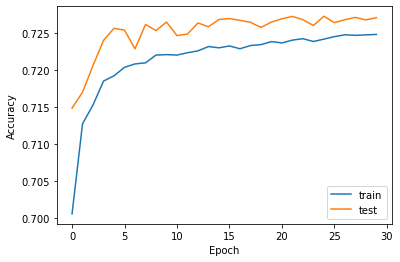

In [ ]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
prediction = model.predict(X_test)

In [ ]:
y_pred = (prediction[:, -1] > 0.5)
print("Accuracy of the model : ", accuracy_score(y_pred, y_test))
print('F1 score: ', f1_score(y_pred, y_test))
print('AUC score: ', roc_auc_score(y_pred, y_test))
print('Confusion matrix:')
confusion_matrix(y_test,y_pred)

Accuracy of the model :  0.745806084731305
F1 score:  0.3045507584597433
AUC score:  0.8027503483574739
Confusion matrix:


array([[9709,  119],
       [3457,  783]])

In [ ]:
labels = ['NotVIP', 'VIP']

In [ ]:
Counter(y_test)

Counter({0.0: 9828, 1.0: 4240})

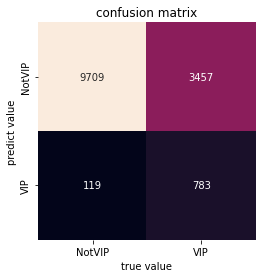

In [ ]:
matric = confusion_matrix(y_pred, y_test)
plt.figure(figsize=(4,4))
sns.heatmap(matric,square=True,annot=True,cbar=False,fmt='d',xticklabels=labels, yticklabels=labels)
plt.ylabel("predict value")
plt.xlabel("true value")
plt.title("confusion matrix")
plt.show()

In [ ]:
print("report:\n",classification_report(y_pred, y_test,labels=[0, 1],target_names=labels))

report:
               precision    recall  f1-score   support

      NotVIP       0.99      0.74      0.84     13166
         VIP       0.18      0.87      0.30       902

    accuracy                           0.75     14068
   macro avg       0.59      0.80      0.57     14068
weighted avg       0.94      0.75      0.81     14068



In [ ]:
prediction_all = model.predict(np.array(X).reshape(len(X), 12, 12))

In [ ]:
y_pred_all = (prediction_all[:, -1] > 0.5)
print("Accuracy of the model : ", accuracy_score(y_pred_all, y))
print('F1 score: ', f1_score(y_pred_all, y))
print('AUC score: ', roc_auc_score(y_pred_all, y))
print('Confusion matrix:')
confusion_matrix(y_pred_all, y)

Accuracy of the model :  0.6573375749127259
F1 score:  0.21617791344162215
AUC score:  0.5018256212978837
Confusion matrix:


array([[51205, 17136],
       [11624,  3966]])

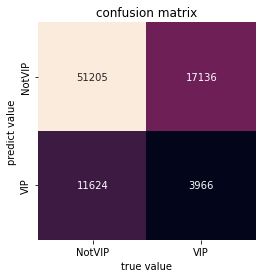

In [ ]:
matric = confusion_matrix(y_pred_all, y)
plt.figure(figsize=(4,4))
sns.heatmap(matric,square=True,annot=True,cbar=False,fmt='d',xticklabels=labels, yticklabels=labels)
plt.ylabel("predict value")
plt.xlabel("true value")
plt.title("confusion matrix")
plt.show()

In [ ]:
print("report:\n",classification_report(y_pred_all, y,labels=[0, 1],target_names=labels))

report:
               precision    recall  f1-score   support

      NotVIP       0.81      0.75      0.78     68341
         VIP       0.19      0.25      0.22     15590

    accuracy                           0.66     83931
   macro avg       0.50      0.50      0.50     83931
weighted avg       0.70      0.66      0.68     83931



In [ ]:
model.layers[0].get_weights()[0].shape

(12, 256)

In [ ]:
def get_layer_output(X, idx):
  get_output = K.function([model.layers[0].input], [model.layers[idx].output])
  return get_output([X])

In [ ]:
layer_output_1 = get_layer_output(X_test, 0)
layer_output_2 = get_layer_output(X_test, 1)
# layer_output_3 = get_layer_output(X_test, 2)
# layer_output_5 = get_layer_output(X_test, 4)

In [ ]:
ot = pd.DataFrame(layer_output_2[0][:, -1], columns=['P'])
ot[ot['P']>0.5]

P
2     0.999998
3     1.000000
4     1.000000
5     1.000000
6     1.000000
...        ...
4471  0.999999
4472  1.000000
4475  1.000000
4476  1.000000
4477  1.000000

[1927 rows x 1 columns]

In [ ]:
def inverse_normalize(data, scaler):
  scaled_df = pd.DataFrame(scaler.inverse_transform(data[cols].values.reshape(-1,12)), columns=cols)
  return scaled_df

In [ ]:
bh_cols = ['add', 'checkout', 'purchase', 'register', 'search', 'traffic', 'viewactivity', 'viewcategory', 'viewmainpage', 'viewproduct']

In [ ]:
X_test_tp = X_test.transpose(0, 1 ,2)
test_data_df = pd.concat([pd.DataFrame(x, columns=cols) for x in X_test_tp], keys=np.arange(X_test_tp.shape[0]))
test_data_df.reset_index(inplace=True)
test_data_df = test_data_df.drop(['level_0', 'level_1'], axis=1)
test_original = inverse_normalize(test_data_df, scaler)
test_original[cols] = test_original[cols].astype(int)

In [ ]:
test_original['bh'] = test_original[bh_cols].apply(lambda x: '\n'.join([y+':'+str(z) for y, z in x.items() if z != 0]), axis=1).to_list()
test_original['x_label'] = (test_original['bh']  
    + ['\n△time:'] * len(test_original) + test_original['TimeDiff'].astype(str)
    + ['\nTotalTime:'] * len(test_original) + test_original['TotalTime'].astype(str))

In [ ]:
test_original['x_label'][0]

'traffic:1\n△time:0\nTotalTime:0'

In [ ]:
layer_output_2[0][0].shape

(12, 1)

## 結果解釋

In [ ]:
def output_ex(idx):
  start_idx = idx * 12
  end_idx = start_idx + 12
  eg = test_original.iloc[start_idx: end_idx]
  eg = eg.loc[~(eg[bh_cols]==0).all(axis=1)]
  x_label =  list(eg['x_label'])
  output_eg = list(layer_output_2[0][idx].reshape(1,12)[0])[-len(x_label):]
  x_axis = range(len(x_label))
  base = [0.5] * len(x_axis)

  plt.figure(figsize=(20,10))
  plt.plot(x_axis, output_eg, color="red", marker='o', markerfacecolor='black', markersize=4)
  plt.plot(x_axis, base, color="blue", linestyle='dashed')
  plt.xticks(x_axis,x_label)
  plt.xlabel('Behavior')
  plt.ylabel('P(VIP)')
  plt.show()

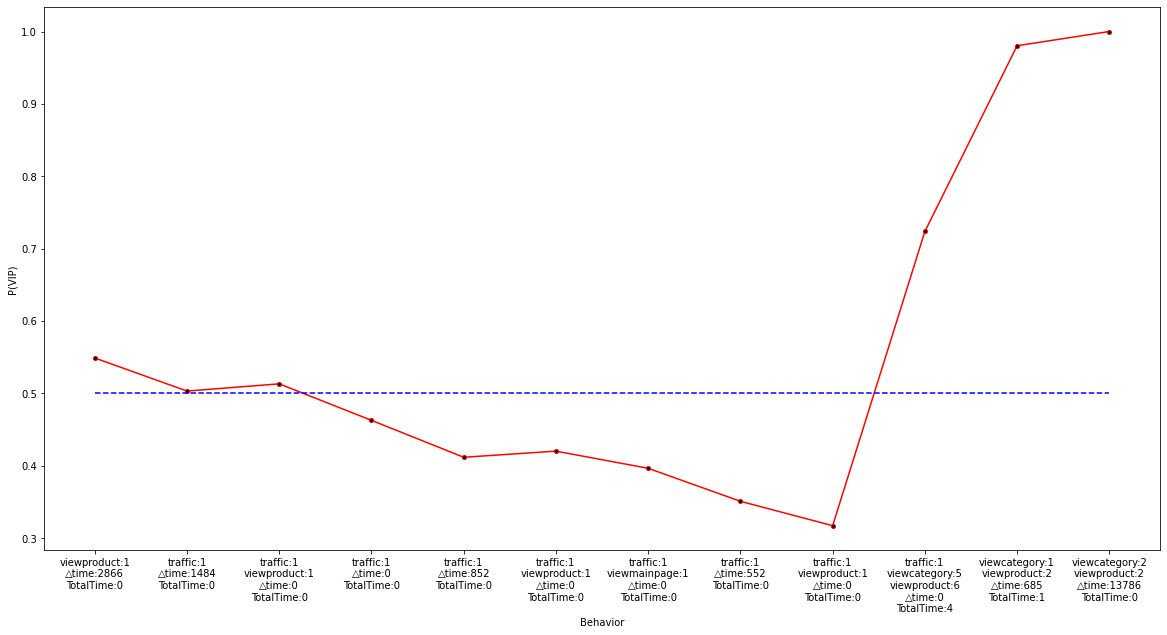

In [ ]:
output_ex(2)

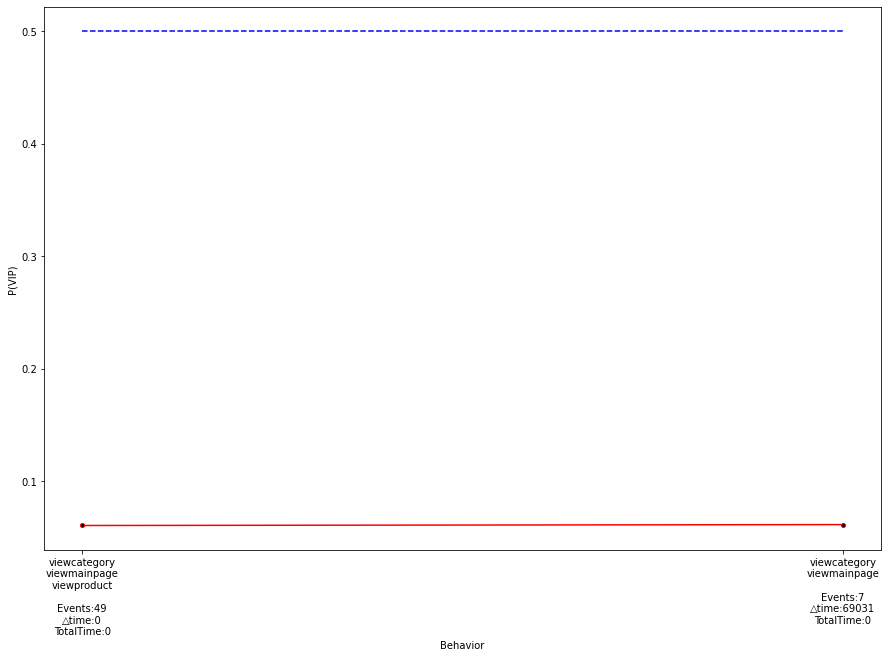

In [ ]:
output_ex(200)

## Tune LSTM

In [ ]:
def tune_LSTM(X_train, y_train, X_test, y_test, layers, neurons, lr, epochs, batch_size):
  model = Sequential()
  model.add(LSTM(neurons, input_shape=(12, 12), return_sequences=True))

  if layers > 1:
    for i in range(1, layers):
      model.add(LSTM(neurons, return_sequences=True))

  model.add(Dense(1, activation='sigmoid'))

  decay_rate = lr / epochs
  opt = Adam(learning_rate=lr, decay=decay_rate)

  # Classification
  model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
  callback = EarlyStopping(monitor='loss', patience=3)
  history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2, callbacks=[callback])

  prediction = model.predict(X_test)
  y_pred = (prediction[:, -1] > 0.5)
  test_acc = accuracy_score(y_pred, y_test)
  test_f1 = f1_score(y_pred, y_test)
  test_AUC = roc_auc_score(y_pred, y_test)

  result = {
      'train_acc': history.history['accuracy'][-1],
      'val_acc': history.history['val_accuracy'][-1],
      'test_acc': test_acc,
      'test_f1': test_f1,
      'test_AUC': test_AUC
  }
  return result

In [ ]:
EPOCHS = 30
BATCH_SIZE = 512
LR = 0.01 

In [ ]:
layers = [1, 2, 3]
neurons = [8, 16, 32, 64]

### LSTM Layers

In [ ]:
NEURONS = 32

In [ ]:
model_list = []

for layer in layers:
  print(layer)
  model = tune_LSTM(X_train, y_train, X_test, y_test, layer, NEURONS, LR, EPOCHS, BATCH_SIZE)
  model_list.append(model)

1
Epoch 1/30
53/53 [==============================] - 6s 51ms/step - loss: 0.6411 - accuracy: 0.6051 - val_loss: 0.5896 - val_accuracy: 0.6809
Epoch 2/30
53/53 [==============================] - 1s 26ms/step - loss: 0.5719 - accuracy: 0.6835 - val_loss: 0.5591 - val_accuracy: 0.6920
Epoch 3/30
53/53 [==============================] - 1s 25ms/step - loss: 0.5566 - accuracy: 0.6915 - val_loss: 0.5501 - val_accuracy: 0.7001
Epoch 4/30
53/53 [==============================] - 1s 25ms/step - loss: 0.5501 - accuracy: 0.6953 - val_loss: 0.5465 - val_accuracy: 0.7020
Epoch 5/30
53/53 [==============================] - 1s 26ms/step - loss: 0.5455 - accuracy: 0.6999 - val_loss: 0.5404 - val_accuracy: 0.7082
Epoch 6/30
53/53 [==============================] - 1s 26ms/step - loss: 0.5427 - accuracy: 0.7013 - val_loss: 0.5404 - val_accuracy: 0.7053
Epoch 7/30
53/53 [==============================] - 1s 27ms/step - loss: 0.5428 - accuracy: 0.7015 - val_loss: 0.5379 - val_accuracy: 0.7086
Epoch 8/30


In [ ]:
result_df = pd.DataFrame(model_list)

In [ ]:
result_df

train_acc   val_acc  test_acc   test_f1  test_AUC
0   0.707149  0.713251  0.802985  0.768546  0.838910
1   0.708410  0.713177  0.803578  0.765753  0.846152
2   0.705911  0.711264  0.802393  0.770942  0.832914

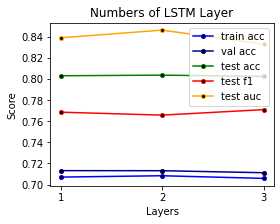

In [ ]:
plt.figure(figsize=(4,3))
plt.plot(range(len(layers)), result_df['train_acc'], color="blue", marker='o', markerfacecolor='black', markersize=4,  label='train acc')
plt.plot(range(len(layers)), result_df['val_acc'], color="darkblue", marker='o', markerfacecolor='black', markersize=4, label='val acc')
plt.plot(range(len(layers)), result_df['test_acc'], color="green", marker='o', markerfacecolor='black', markersize=4, label='test acc')
plt.plot(range(len(layers)), result_df['test_f1'], color="red", marker='o', markerfacecolor='black', markersize=4, label='test f1')
plt.plot(range(len(layers)), result_df['test_AUC'], color="orange", marker='o', markerfacecolor='black', markersize=4, label='test auc')
plt.xticks(range(len(layers)), layers)
plt.title('Numbers of LSTM Layer')
plt.xlabel('Layers')
plt.ylabel('Score')
plt.legend()
plt.show()

### Hidden Neurons of LSTM Layers

In [ ]:
LAYERS = 2

In [ ]:
model_list = []

for neuron in neurons:
  print(neuron)
  model = tune_LSTM(X_train, y_train, X_test, y_test, LAYERS, neuron, LR, EPOCHS, BATCH_SIZE)
  model_list.append(model)

8
Epoch 1/30
53/53 [==============================] - 7s 46ms/step - loss: 0.6710 - accuracy: 0.5571 - val_loss: 0.5995 - val_accuracy: 0.6877
Epoch 2/30
53/53 [==============================] - 1s 24ms/step - loss: 0.5794 - accuracy: 0.6740 - val_loss: 0.5654 - val_accuracy: 0.6912
Epoch 3/30
53/53 [==============================] - 1s 24ms/step - loss: 0.5575 - accuracy: 0.6897 - val_loss: 0.5495 - val_accuracy: 0.6998
Epoch 4/30
53/53 [==============================] - 1s 24ms/step - loss: 0.5483 - accuracy: 0.6950 - val_loss: 0.5426 - val_accuracy: 0.7054
Epoch 5/30
53/53 [==============================] - 1s 24ms/step - loss: 0.5440 - accuracy: 0.6989 - val_loss: 0.5369 - val_accuracy: 0.7075
Epoch 6/30
53/53 [==============================] - 1s 25ms/step - loss: 0.5398 - accuracy: 0.7013 - val_loss: 0.5402 - val_accuracy: 0.7042
Epoch 7/30
53/53 [==============================] - 1s 24ms/step - loss: 0.5400 - accuracy: 0.7007 - val_loss: 0.5336 - val_accuracy: 0.7095
Epoch 8/30


In [ ]:
result_df = pd.DataFrame(model_list)

In [ ]:
result_df

train_acc   val_acc  test_acc   test_f1  test_AUC
0   0.705566  0.711992  0.800142  0.767085  0.832521
1   0.708343  0.713411  0.803578  0.772065  0.834630
2   0.706732  0.713165  0.805355  0.770883  0.842363
3   0.708383  0.713263  0.800379  0.758284  0.849823

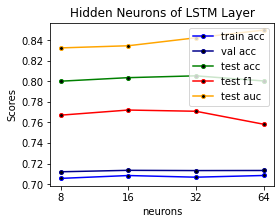

In [ ]:
plt.figure(figsize=(4,3))
plt.plot(range(len(neurons)), result_df['train_acc'], color="blue", marker='o', markerfacecolor='black', markersize=4,  label='train acc')
plt.plot(range(len(neurons)), result_df['val_acc'], color="darkblue", marker='o', markerfacecolor='black', markersize=4, label='val acc')
plt.plot(range(len(neurons)), result_df['test_acc'], color="green", marker='o', markerfacecolor='black', markersize=4, label='test acc')
plt.plot(range(len(neurons)), result_df['test_f1'], color="red", marker='o', markerfacecolor='black', markersize=4, label='test f1')
plt.plot(range(len(neurons)), result_df['test_AUC'], color="orange", marker='o', markerfacecolor='black', markersize=4, label='test auc')
plt.xticks(range(len(neurons)), neurons)
plt.title('Hidden Neurons of LSTM Layer')
plt.xlabel('neurons')
plt.ylabel('Scores')
plt.legend()
plt.show()

### 決定 learning rate

In [ ]:
LAYERS = 2
NEURONS = 32

EPOCHS = 30
BATCH_SIZE = 512
LRs = [0.1, 0.01, 0.001]

In [ ]:
model_list = []

for LR in LRs:
  print(LR)
  model = tune_LSTM(X_train, y_train, X_test, y_test, LAYERS, NEURONS, LR, EPOCHS, BATCH_SIZE)
  model_list.append(model)

0.1
Epoch 1/30
53/53 [==============================] - 10s 80ms/step - loss: 0.7056 - accuracy: 0.5187 - val_loss: 0.6879 - val_accuracy: 0.5587
Epoch 2/30
53/53 [==============================] - 3s 57ms/step - loss: 0.6942 - accuracy: 0.5118 - val_loss: 0.6941 - val_accuracy: 0.4993
Epoch 3/30
53/53 [==============================] - 3s 58ms/step - loss: 0.6898 - accuracy: 0.5292 - val_loss: 0.6921 - val_accuracy: 0.5337
Epoch 4/30
53/53 [==============================] - 3s 58ms/step - loss: 0.6752 - accuracy: 0.5545 - val_loss: 0.6350 - val_accuracy: 0.6239
Epoch 5/30
53/53 [==============================] - 3s 59ms/step - loss: 0.6809 - accuracy: 0.5696 - val_loss: 0.6979 - val_accuracy: 0.4948
Epoch 6/30
53/53 [==============================] - 3s 58ms/step - loss: 0.6528 - accuracy: 0.5791 - val_loss: 0.6020 - val_accuracy: 0.6654
Epoch 7/30
53/53 [==============================] - 3s 57ms/step - loss: 0.5940 - accuracy: 0.6574 - val_loss: 0.5780 - val_accuracy: 0.6641
Epoch 8/

In [ ]:
result_df = pd.DataFrame(model_list)

In [ ]:
result_df

train_acc   val_acc  test_acc   test_f1  test_AUC
0   0.705961  0.710931  0.802748  0.772572  0.831306
1   0.705183  0.711178  0.796588  0.773034  0.814137
2   0.702481  0.708401  0.790428  0.748257  0.834558

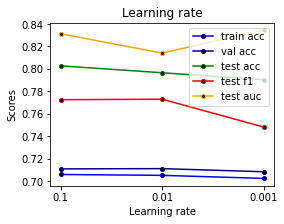

In [ ]:
plt.figure(figsize=(4,3))
plt.plot(range(len(LRs)), result_df['train_acc'], color="blue", marker='o', markerfacecolor='black', markersize=4,  label='train acc')
plt.plot(range(len(LRs)), result_df['val_acc'], color="darkblue", marker='o', markerfacecolor='black', markersize=4, label='val acc')
plt.plot(range(len(LRs)), result_df['test_acc'], color="green", marker='o', markerfacecolor='black', markersize=4, label='test acc')
plt.plot(range(len(LRs)), result_df['test_f1'], color="red", marker='o', markerfacecolor='black', markersize=4, label='test f1')
plt.plot(range(len(LRs)), result_df['test_AUC'], color="orange", marker='o', markerfacecolor='black', markersize=4, label='test auc')
plt.xticks(range(len(LRs)), LRs)
plt.title('Learning rate')
plt.xlabel('Learning rate')
plt.ylabel('Scores')
plt.legend()
plt.show()

In [ ]:
model_list[1]

{'test_AUC': 0.814136546469557,
 'test_acc': 0.796588081980808,
 'test_f1': 0.7730337078651685,
 'train_acc': 0.7051833271980286,
 'val_acc': 0.7111778259277344}

## 最佳 model 訓練

In [ ]:
model = Sequential()
  
model.add(LSTM(32, input_shape=(12, 12), return_sequences=True))
model.add(LSTM(32, return_sequences=True))   
model.add(Dense(1, activation='sigmoid'))

decay_rate = 0.01 / 30
opt = Adam(lr=0.01, decay=decay_rate)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_26 (LSTM)              (None, 12, 32)            5760      
                                                                 
 lstm_27 (LSTM)              (None, 12, 32)            8320      
                                                                 
 dense_15 (Dense)            (None, 12, 1)             33        
                                                                 
Total params: 14,113
Trainable params: 14,113
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
callback = EarlyStopping(monitor='loss', patience=3)
EPOCHS = 30
BATCH_SIZE = 512
history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_split=0.2, callbacks=[callback], verbose=1)

Epoch 1/30
53/53 [==============================] - 9s 86ms/step - loss: 0.6436 - accuracy: 0.5965 - val_loss: 0.6017 - val_accuracy: 0.6312
Epoch 2/30
53/53 [==============================] - 3s 54ms/step - loss: 0.5688 - accuracy: 0.6750 - val_loss: 0.5491 - val_accuracy: 0.7019
Epoch 3/30
53/53 [==============================] - 3s 54ms/step - loss: 0.5502 - accuracy: 0.6941 - val_loss: 0.5432 - val_accuracy: 0.7036
Epoch 4/30
53/53 [==============================] - 3s 53ms/step - loss: 0.5443 - accuracy: 0.6978 - val_loss: 0.5396 - val_accuracy: 0.7052
Epoch 5/30
53/53 [==============================] - 3s 52ms/step - loss: 0.5407 - accuracy: 0.7002 - val_loss: 0.5405 - val_accuracy: 0.7049
Epoch 6/30
53/53 [==============================] - 3s 53ms/step - loss: 0.5385 - accuracy: 0.7019 - val_loss: 0.5359 - val_accuracy: 0.7082
Epoch 7/30
53/53 [==============================] - 3s 51ms/step - loss: 0.5356 - accuracy: 0.7038 - val_loss: 0.5335 - val_accuracy: 0.7098
Epoch 8/30
53

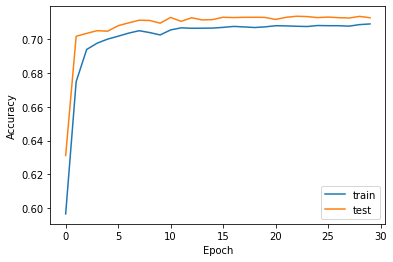

In [ ]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
prediction = model.predict(X_test)

In [ ]:
y_pred = (prediction[:, -1] > 0.5)
print("Accuracy of the model : ", accuracy_score(y_pred, y_test))
print('F1 score: ', f1_score(y_pred, y_test))
print('AUC score: ', roc_auc_score(y_pred, y_test))
print('Confusion matrix:')
confusion_matrix(y_test,y_pred)

Accuracy of the model :  0.8040516526477905
F1 score:  0.777986577181208
AUC score:  0.8266757558981143
Confusion matrix:


array([[3889,  263],
       [1391, 2898]])

In [ ]:
labels = ['Inactive', 'Active']

In [ ]:
Counter(y_test)

Counter({0.0: 4152, 1.0: 4289})

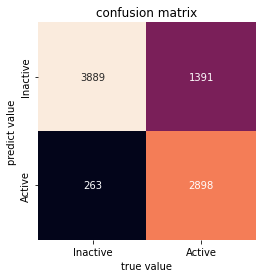

In [ ]:
matric = confusion_matrix(y_pred, y_test)
plt.figure(figsize=(4,4))
sns.heatmap(matric,square=True,annot=True,cbar=False,fmt='d',xticklabels=labels, yticklabels=labels)
plt.ylabel("predict value")
plt.xlabel("true value")
plt.title("confusion matrix")
plt.show()

In [ ]:
print("report:\n",classification_report(y_pred, y_test,labels=[0, 1],target_names=labels))

report:
               precision    recall  f1-score   support

    Inactive       0.94      0.74      0.82      5280
      Active       0.68      0.92      0.78      3161

    accuracy                           0.80      8441
   macro avg       0.81      0.83      0.80      8441
weighted avg       0.84      0.80      0.81      8441



In [ ]:
prediction_all = model.predict(np.array(X).reshape(len(X), 12, 12))

In [ ]:
y_pred_all = (prediction_all[:, -1] > 0.5)
print("Accuracy of the model : ", accuracy_score(y_pred_all, y))
print('F1 score: ', f1_score(y_pred_all, y))
print('AUC score: ', roc_auc_score(y_pred_all, y))
print('Confusion matrix:')
confusion_matrix(y_pred_all, y)

Accuracy of the model :  0.4185342721997832
F1 score:  0.36715639871882977
AUC score:  0.5019769069261315
Confusion matrix:


array([[20971,  6945],
       [41858, 14157]])

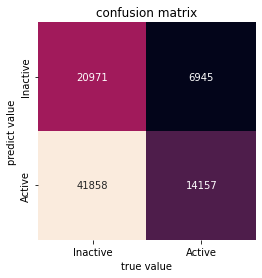

In [ ]:
matric = confusion_matrix(y_pred_all, y)
plt.figure(figsize=(4,4))
sns.heatmap(matric,square=True,annot=True,cbar=False,fmt='d',xticklabels=labels, yticklabels=labels)
plt.ylabel("predict value")
plt.xlabel("true value")
plt.title("confusion matrix")
plt.show()

In [ ]:
print("report:\n",classification_report(y_pred_all, y,labels=[0, 1],target_names=labels))

report:
               precision    recall  f1-score   support

    Inactive       0.33      0.75      0.46     27916
      Active       0.67      0.25      0.37     56015

    accuracy                           0.42     83931
   macro avg       0.50      0.50      0.41     83931
weighted avg       0.56      0.42      0.40     83931



## 取得每層 output

In [ ]:
model.layers[0].get_weights()[0].shape

(12, 128)

In [ ]:
def get_layer_output(X, idx):
  get_output = K.function([model.layers[0].input], [model.layers[idx].output])
  return get_output([X])

In [ ]:
output_layer = get_layer_output(X_test, 2)
all_output_layer = get_layer_output(event_X_uds, 2)

In [ ]:
ot = pd.DataFrame(output_layer[0][:, -1], columns=['P'])
ot[(ot['P']<0.5)&(ot['P']>0.4)].index.values

array([ 159,  197,  206,  225,  226,  254,  267,  278,  285,  365,  422,
        532,  560,  586,  598,  638,  657,  700,  713,  731,  791,  847,
        866,  897,  920,  925,  936,  944,  980,  989, 1007, 1055, 1112,
       1127, 1130, 1136, 1149, 1190, 1239, 1312, 1340, 1359, 1367, 1377,
       1378, 1384, 1430, 1434, 1439, 1447, 1477, 1493, 1505, 1581, 1582,
       1623, 1677, 1690, 1724, 1727, 1731, 1755, 1765, 1775, 1787, 1794,
       1795, 1849, 1866, 1868, 1878, 1884, 1890, 1896, 1910, 1950, 2052,
       2070, 2094, 2195, 2222, 2236, 2244, 2272, 2290, 2303, 2336, 2340,
       2361, 2373, 2440, 2444, 2445, 2446, 2458, 2485, 2491, 2560, 2568,
       2578, 2602, 2614, 2733, 2770, 2792, 2822, 2864, 2946, 3033, 3045,
       3059, 3064, 3080, 3098, 3118, 3164, 3270, 3278, 3284, 3295, 3296,
       3358, 3369, 3371, 3431, 3437, 3466, 3592, 3630, 3636, 3640, 3705,
       3735, 3744, 3756, 3781, 3790, 3795, 3817, 3826, 3880, 3917, 3919,
       3929, 4030, 4046, 4070, 4078, 4109, 4133, 41

## inverse scaler of X data

In [ ]:
def inverse_normalize(data, scaler):
  scaled_df = pd.DataFrame(scaler.inverse_transform(data[event_cols].values.reshape(-1,12)), columns=event_cols)
  return scaled_df

In [ ]:
bh_cols = ['add', 'checkout', 'purchase', 'register', 'search', 'traffic', 'viewactivity', 'viewcategory', 'viewmainpage', 'viewproduct']

### Test Data

In [ ]:
X_test_tp = X_test.transpose(0, 1 ,2)
test_data_df = pd.concat([pd.DataFrame(x, columns=event_cols) for x in X_test_tp], keys=np.arange(X_test_tp.shape[0]))
test_data_df.reset_index(inplace=True)
test_data_df = test_data_df.drop(['level_0', 'level_1'], axis=1)
test_original = inverse_normalize(test_data_df, scaler)
test_original[event_cols] = test_original[event_cols].astype(int)

In [ ]:
test_original['bh'] = test_original[bh_cols].apply(lambda x: '\n'.join([y+':'+str(z) for y, z in x.items() if z != 0]), axis=1).to_list()
test_original['x_label'] = (test_original['bh']  
    + ['\n△time:'] * len(test_original) + test_original['TimeDiff'].astype(str)
    + ['\nTotalTime:'] * len(test_original) + test_original['TotalTime'].astype(str))

### All Undersampled Data

In [ ]:
X_uds_tp = event_X_uds.transpose(0, 1 ,2)
all_data_df = pd.concat([pd.DataFrame(x, columns=event_cols) for x in X_uds_tp], keys=np.arange(X_uds_tp.shape[0]))
all_data_df.reset_index(inplace=True)
all_data_df = all_data_df.drop(['level_0', 'level_1'], axis=1)
all_data_original = inverse_normalize(all_data_df, scaler)
all_data_original[event_cols] = all_data_original[event_cols].astype(int)

In [ ]:
all_data_original['bh'] = all_data_original[bh_cols].apply(lambda x: '\n'.join([y+':'+str(z) for y, z in x.items() if z != 0]), axis=1).to_list()
all_data_original['x_label'] = (all_data_original['bh']  
    + ['\n△time:'] * len(all_data_original) + all_data_original['TimeDiff'].astype(str)
    + ['\nTotalTime:'] * len(all_data_original) + all_data_original['TotalTime'].astype(str))

In [ ]:
all_data_original['x_label'][0]

'\n△time:0\nTotalTime:0'

## 結果解釋

In [ ]:
def get_output_df(idx, data, output_layer):
  start_idx = idx * 12
  end_idx = (idx + 1) * 12
  df_eg = data.iloc[start_idx: end_idx]
  df_eg = df_eg.loc[~(df_eg[bh_cols]==0).all(axis=1)]
  df_eg['Output'] = list(output_layer[0][idx].reshape(1,12)[0])[-len(df_eg):]
  df_eg['Member'] = ['Member' + str(idx)] *len(df_eg)

  return df_eg

### 取得 all output of test data

In [ ]:
len(get_output_df(1069, test_original, output_layer))

1

In [ ]:
df_egs = []
for i in range(len(X_test)):
  df_eg = get_output_df(i, test_original, output_layer)
  df_egs.append(df_eg)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
test_output = pd.concat(df_egs)

In [ ]:
len(test_output['Member'].unique())

8441

In [ ]:
test_output.to_csv('Session Behavior Count + RF Outputs for test data.csv', index=False)

### 取得 all output of all undersampled data

In [ ]:
df_egs = []
for i in range(len(event_X_uds)):
  df_eg = get_output_df(i, all_data_original, all_output_layer)
  df_egs.append(df_eg)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
all_output = pd.concat(df_egs)

In [ ]:
len(all_output['Member'].unique())

42204

In [ ]:
all_output.to_csv('Session Behavior Count + RF Outputs.csv', index=False)

# RF Model

## 取得 P(Active)

In [ ]:
event_cols = range(144)

In [ ]:
all_data[event_cols].head()

0    1    2    3    4    5    6         7         8         9    ...  \
0  0.000000  0.0  0.0  0.0  0.0  1.0  0.0  0.000000  0.000000  0.000000  ...   
1  0.000000  0.0  0.0  0.0  0.0  1.0  0.0  0.005495  0.000000  0.000000  ...   
2  0.024691  0.0  0.0  0.0  0.0  0.0  0.0  0.071429  0.001005  0.097166  ...   
3  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000  ...   
4  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.021978  0.004020  0.032389  ...   

   134  135  136  137  138       139       140       141       142       143  
0  0.0  0.0  0.0  0.0  0.0  0.005495  0.002010  0.000000  0.029352  0.005263  
1  0.0  0.0  0.0  0.0  0.0  0.000000  0.001005  0.000000  0.009346  0.000000  
2  0.0  0.0  0.0  0.0  0.0  0.000000  0.002010  0.016194  0.036475  0.005263  
3  0.0  0.0  0.0  0.0  0.0  0.005495  0.000000  0.000000  0.000919  0.000000  
4  0.0  0.0  0.0  0.0  0.0  0.109890  0.003015  0.060729  0.001149  0.015789  

[5 rows x 144 columns]

In [ ]:
all_event_X = np.array(all_data[event_cols]).reshape(len(all_data), 12, 12)
all_event_y = all_data['Active']

In [ ]:
active_preds = model.predict(all_event_X)

In [ ]:
active_preds_binary = (active_preds[:, -1] > 0.5)
print("Accuracy of the model : ", accuracy_score(active_preds_binary, all_event_y))
print('F1 score: ', f1_score(active_preds_binary, all_event_y))
print('AUC score: ', roc_auc_score(active_preds_binary, all_event_y))
print('Confusion matrix:')
confusion_matrix(active_preds_binary, all_event_y)

Accuracy of the model :  0.4185342721997832
F1 score:  0.36715639871882977
AUC score:  0.5019769069261315
Confusion matrix:


array([[20971,  6945],
       [41858, 14157]])

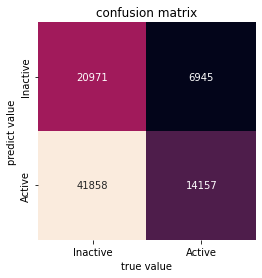

In [ ]:
matric = confusion_matrix(y_pred_all, y)
plt.figure(figsize=(4,4))
sns.heatmap(matric,square=True,annot=True,cbar=False,fmt='d',xticklabels=labels, yticklabels=labels)
plt.ylabel("predict value")
plt.xlabel("true value")
plt.title("confusion matrix")
plt.show()

In [ ]:
print("report:\n",classification_report(y_pred_all, y,labels=[0, 1],target_names=labels))

report:
               precision    recall  f1-score   support

    Inactive       0.33      0.75      0.46     27916
      Active       0.67      0.25      0.37     56015

    accuracy                           0.42     83931
   macro avg       0.50      0.50      0.41     83931
weighted avg       0.56      0.42      0.40     83931



In [ ]:
all_data['Active_Probability'] = active_preds[:, -1]

## Build Model

In [ ]:
# all X columns
X_cols = ['Lifespan_days', 'CAI', 'Monetary', 'Recency', 'Frequency', 'ActiveDays', 'PromotionUsedRate', 'CompleteOrders', 'ReturnRate', 'Active_Probability']

In [ ]:
X = all_data[X_cols]
y = all_data['VIP'].astype(int)

In [ ]:
pd.concat([X,y], axis=1).to_csv('Features of Session based + RF.csv', index=False)

### Step 1: Undersampling major class Experiment 

In [ ]:
# summarize class distribution
counter = Counter(y)
print(counter)

Counter({0: 72733, 1: 11198})


In [ ]:
print('Total: ', len(all_data))
print('Not VIP %:', counter[0]/len(all_data))
print('VIP %:', counter[1]/len(all_data))

Total:  83931
Not VIP %: 0.8665808819149063
VIP %: 0.1334191180850937


In [ ]:
class ActivePrediction():
  def __init__(self, X, y, active_weight, X_cols):
    self.X = X
    self.y = y
    self.active_weight = active_weight
    self.X_cols = X_cols

    self.reset()

  def reset(self):
    self.data_res = []
    self.X_binary = []
    self.y_binary = []

    self.cv_score_accuracy = []
    self.cv_score_roc = []

    self.train_accuracy = 0
    self.test_accuracy = 0
    self.test_F1 = 0
    self.test_auc = 0

    self.classification_report = []

    self.y_test = []
    self.y_preds = []

  def undersampling(self):
    print('------------------- Start to undersampling-------------------------')
    counter = Counter(y)
    inactive_num = int(counter[1]*(1-self.active_weight)/self.active_weight)
    nm = NearMiss(sampling_strategy={0: inactive_num}, version=1)
    X_res, y_res = nm.fit_resample(self.X, self.y)

    # summarize the new class distribution
    counter = Counter(y_res)
    print('undersampling:', counter)
    print('------------------- Finished to undersampling-------------------------')
    return pd.concat([X_res, y_res], axis=1)
    

  def cross_val(self, score, X_train, y_train):
    rfc_cv_score = cross_val_score(self.model, X_train, y_train, cv=5, scoring=score)
    return {'scores': rfc_cv_score, 'Mean score': rfc_cv_score.mean()}

  def train_RF_model(self, X_train, X_test, y_train, y_test):
    self.model = RandomForestClassifier(max_depth=5,n_estimators=200)
    self.model.fit(X_train, y_train)
    self.y_pred = self.model.predict(X_test)
    print('------------------- Start to CV-------------------------')
    self.cv_score_accuracy = self.cross_val('accuracy', X_train, y_train)
    self.cv_score_roc = self.cross_val('roc_auc_ovr', X_train, y_train)
    print('------------------- Finished to CV-------------------------')

    print("Accuracy score on train data:", self.model.score(X_train, y_train))
    print("Accuracy score on test data:", self.model.score(X_test, y_test))
    
    self.train_accuracy = self.model.score(X_train, y_train)
    self.test_accuracy = self.model.score(X_test, y_test)

    self.test_F1 = f1_score(y_test, self.y_pred)
    self.test_auc = roc_auc_score(y_test, self.y_pred)
    print('F1 score on test data:', self.test_F1)
    print('AUC score on test data:', self.test_auc)
 
    labels = [0, 1]
    label_names = ['Not VIP', 'VIP']
    self.classification_report = classification_report(y_test, self.y_pred,labels=labels,target_names=label_names)

  def build_model(self):
    if self.active_weight == 0:
      self.data_res = pd.concat([self.X, self.y], axis=1)
      X_binary = self.X
      y_binary = self.y
    else:
      self.data_res = self.undersampling()
      X_binary = self.data_res[X_cols]
      y_binary = self.data_res['VIP'].astype(int)

    X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.2, random_state=123)

    self.train_RF_model(X_train, X_test, y_train, y_test)
    self.y_test = y_test

In [ ]:
active_weights = [0.3, 0.4, 0.5]
models = []

for w in active_weights:
  print('Active_weight:', w)
  model = ActivePrediction(X, y, w, X_cols)
  model.build_model()

  models.append(model)

Active_weight: 0.3
------------------- Start to undersampling-------------------------
undersampling: Counter({0: 26128, 1: 11198})
------------------- Finished to undersampling-------------------------
------------------- Start to CV-------------------------
------------------- Finished to CV-------------------------
Accuracy score on train data: 0.907602143335566
Accuracy score on test data: 0.9034288775783552
F1 score on test data: 0.818342151675485
AUC score on test data: 0.8493910492751745
Active_weight: 0.4
------------------- Start to undersampling-------------------------
undersampling: Counter({0: 16797, 1: 11198})
------------------- Finished to undersampling-------------------------
------------------- Start to CV-------------------------
------------------- Finished to CV-------------------------
Accuracy score on train data: 0.9128415788533667
Accuracy score on test data: 0.9164136452938024
F1 score on test data: 0.8874458874458875
AUC score on test data: 0.90045327157964


In [ ]:
pd.DataFrame([models[0].cv_score_accuracy, models[1].cv_score_accuracy, models[2].cv_score_accuracy])

scores  Mean score
0  [0.905224380442063, 0.9135967849966511, 0.9007...    0.906062
1  [0.9109375, 0.9160526903326636, 0.908238446081...    0.910430
2  [0.921875, 0.919620429807424, 0.92910968462182...    0.920071

In [ ]:
pd.DataFrame([models[0].cv_score_roc, models[1].cv_score_roc, models[2].cv_score_roc])

scores  Mean score
0  [0.9229918516911357, 0.921218616823231, 0.9096...    0.916091
1  [0.9452773971329396, 0.9481116938805879, 0.937...    0.942681
2  [0.9588318386090111, 0.9620885523773914, 0.964...    0.958174

In [ ]:
labels = [0, 1]
label_names = ['Not VIP', 'VIP']

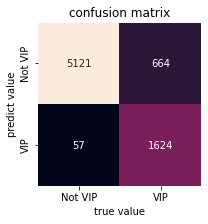

In [ ]:
matric = confusion_matrix(models[0].y_pred, models[0].y_test)
plt.figure(figsize=(3,3))
sns.heatmap(matric,square=True,annot=True,cbar=False,fmt='d',xticklabels=label_names, yticklabels=label_names)
plt.ylabel("predict value")
plt.xlabel("true value")
plt.title("confusion matrix")
plt.show()

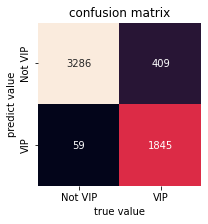

In [ ]:
matric = confusion_matrix(models[1].y_pred, models[1].y_test)
plt.figure(figsize=(3,3))
sns.heatmap(matric,square=True,annot=True,cbar=False,fmt='d',xticklabels=label_names, yticklabels=label_names)
plt.ylabel("predict value")
plt.xlabel("true value")
plt.title("confusion matrix")
plt.show()

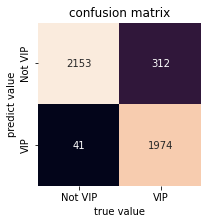

In [ ]:
matric = confusion_matrix(models[2].y_pred, models[2].y_test)
plt.figure(figsize=(3,3))
sns.heatmap(matric,square=True,annot=True,cbar=False,fmt='d',xticklabels=label_names, yticklabels=label_names)
plt.ylabel("predict value")
plt.xlabel("true value")
plt.title("confusion matrix")
plt.show()

In [ ]:
print("report:\n",models[0].classification_report)

report:
               precision    recall  f1-score   support

     Not VIP       0.89      0.99      0.93      5178
         VIP       0.97      0.71      0.82      2288

    accuracy                           0.90      7466
   macro avg       0.93      0.85      0.88      7466
weighted avg       0.91      0.90      0.90      7466



In [ ]:
print("report:\n",models[1].classification_report)

report:
               precision    recall  f1-score   support

     Not VIP       0.89      0.98      0.93      3345
         VIP       0.97      0.82      0.89      2254

    accuracy                           0.92      5599
   macro avg       0.93      0.90      0.91      5599
weighted avg       0.92      0.92      0.91      5599



In [ ]:
print("report:\n",models[2].classification_report)

report:
               precision    recall  f1-score   support

     Not VIP       0.87      0.98      0.92      2194
         VIP       0.98      0.86      0.92      2286

    accuracy                           0.92      4480
   macro avg       0.93      0.92      0.92      4480
weighted avg       0.93      0.92      0.92      4480



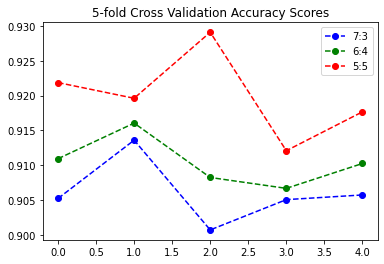

In [ ]:
plt.plot(models[0].cv_score_accuracy['scores'], linestyle='--', marker='o', color='b', label='7:3')
plt.plot(models[1].cv_score_accuracy['scores'], linestyle='--', marker='o', color='g', label='6:4')
plt.plot(models[2].cv_score_accuracy['scores'], linestyle='--', marker='o', color='r', label='5:5')
plt.title('5-fold Cross Validation Accuracy Scores')
plt.legend()

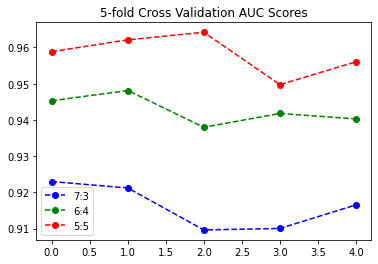

In [ ]:
plt.plot(models[0].cv_score_roc['scores'], linestyle='--', marker='o', color='b', label='7:3')
plt.plot(models[1].cv_score_roc['scores'], linestyle='--', marker='o', color='g', label='6:4')
plt.plot(models[2].cv_score_roc['scores'], linestyle='--', marker='o', color='r', label='5:5')
plt.title('5-fold Cross Validation AUC Scores')
plt.legend()

### Train Binary Model

In [ ]:
counter = Counter(y)

In [ ]:
active_weight = 0.5
inactive_num = int(counter[1]*(1-active_weight)/active_weight)
nm = NearMiss(sampling_strategy={0: inactive_num}, version=1)
X_res, y_res = nm.fit_resample(X, y)

# summarize the new class distribution
counter = Counter(y_res)
print('undersampling:', counter)

undersampling: Counter({0: 11198, 1: 11198})


In [ ]:
data_res = pd.concat([X_res, y_res], axis=1)

In [ ]:
data_res.to_csv('Session Behavoir + Random Forest UnderSampled Data(model 2).csv', index=False)

### 訓練 model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=123)

In [ ]:
data_res['Train/Test'] = ['Train'] * len(data_res)
data_res.loc[X_test.index, 'Train/Test'] = 'Test'

In [ ]:
data_res.to_csv('Train Test Data(model 2).csv', index=False)

In [ ]:
Counter(y_train)

Counter({0: 9004, 1: 8912})

In [ ]:
Counter(y_test)

Counter({0: 2194, 1: 2286})

### Hyperparameter Tuning

In [ ]:
# Determine optimal parameters:
# Declare a baseline classifier:
forest = RandomForestClassifier()

# Create the grid parameter:
grid_rf = {
    'n_estimators': [100, 120, 150, 200],
    'criterion': ['entropy', 'gini'], 
    'max_depth': range(2,6),
    'max_features': ['auto', 'sqrt', 'log2', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],  
    'min_samples_split': range(2,10),
    'min_samples_leaf': range(1,11),
    # 'n_estimators': [120],
    # 'criterion': ['gini'],
    # 'max_depth': [5],
    # 'max_features': [4],
    # 'min_samples_split': [6],
    # 'min_samples_leaf': [5]
}

# Create the grid:
gs_rf = GridSearchCV(forest, grid_rf, cv=5, n_jobs=-1, verbose=1)

# Fit using grid search:
gs_rf.fit(X_train, y_train)

# Print best accuracy and best parameters:
print('Best accuracy: %.3f' % gs_rf.best_score_)
print('\nBest params:\n', gs_rf.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best accuracy: 0.921

Best params:
 {'criterion': 'gini', 'max_depth': 5, 'max_features': 4, 'min_samples_leaf': 5, 'min_samples_split': 6, 'n_estimators': 120}


In [ ]:
rf_model = RandomForestClassifier(max_depth=5,n_estimators=120,criterion='gini',max_features=4,min_samples_split=6,min_samples_leaf=5)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [ ]:
rfc_cv_score = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')

In [ ]:
print("=== All ACCURACY Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean ACCURACY Score ===")
print("Mean ACCURACY Score - Random Forest: ", rfc_cv_score.mean())

=== All ACCURACY Scores ===
[0.91992188 0.9215741  0.92883059 0.90929389 0.91934133]


=== Mean ACCURACY Score ===
Mean ACCURACY Score - Random Forest:  0.9197923571378734


Text(0.5, 1.0, '5-fold Cross Validation Accuracy Scores')

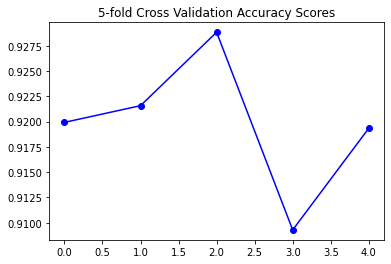

In [ ]:
plt.plot(rfc_cv_score, marker='o', color='b')
plt.title('5-fold Cross Validation Accuracy Scores')

In [ ]:
rfc_cv_score = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='roc_auc_ovr')

In [ ]:
print("=== All ROC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean ROC Score ===")
print("Mean ROC Score - Random Forest: ", rfc_cv_score.mean())

=== All ROC Scores ===
[0.95934364 0.96272652 0.96467451 0.94932093 0.95633303]


=== Mean ROC Score ===
Mean ROC Score - Random Forest:  0.9584797255683613


Text(0.5, 1.0, '5-fold Cross Validation AUC Scores')

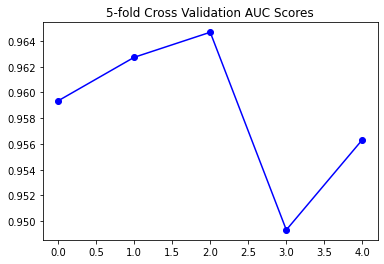

In [ ]:
plt.plot(rfc_cv_score, marker='o', color='b')
plt.title('5-fold Cross Validation AUC Scores')

In [ ]:
print("Accuracy score on train data:", rf_model.score(X_train, y_train))
print("Accuracy score on test data:", rf_model.score(X_test, y_test))
print("F1 score on test data:", f1_score(y_test, y_pred))
print("AUC score on test data:", roc_auc_score(y_test, y_pred))

Accuracy score on train data: 0.9232529582496093
Accuracy score on test data: 0.9236607142857143
F1 score on test data: 0.9208333333333333
AUC score on test data: 0.9247841285108277


In [ ]:
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()

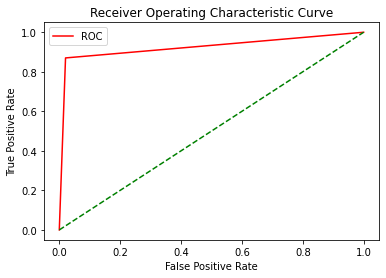

In [ ]:
fper, tper, thresholds = roc_curve(y_test, y_pred)
plot_roc_curve(fper, tper)

In [ ]:
labels = [0, 1]
label_names = ['Not VIP', 'VIP']

In [ ]:
len(y_test)

4480

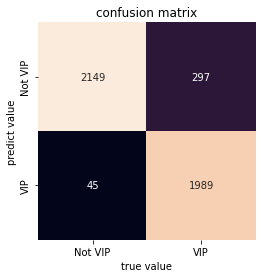

In [ ]:
matric = confusion_matrix(y_pred, y_test)
plt.figure(figsize=(4,4))
sns.heatmap(matric,square=True,annot=True,cbar=False,fmt='d',xticklabels=label_names, yticklabels=label_names)
plt.ylabel("predict value")
plt.xlabel("true value")
plt.title("confusion matrix")
plt.show()

In [ ]:
print("report:\n",classification_report(y_test, y_pred,labels=labels,target_names=label_names))

report:
               precision    recall  f1-score   support

     Not VIP       0.88      0.98      0.93      2194
         VIP       0.98      0.87      0.92      2286

    accuracy                           0.92      4480
   macro avg       0.93      0.92      0.92      4480
weighted avg       0.93      0.92      0.92      4480



In [ ]:
importance = list(rf_model.feature_importances_)
rf_FS = pd.DataFrame({'Columns': list(X_res.columns), 'Importance': importance}).sort_values(by=["Importance"], ascending=False)
rf_FS

Columns  Importance
7      CompleteOrders    0.358278
5          ActiveDays    0.204678
4           Frequency    0.134664
2            Monetary    0.081479
3             Recency    0.076412
0       Lifespan_days    0.070160
1                 CAI    0.060040
8          ReturnRate    0.011300
6   PromotionUsedRate    0.002720
9  Active_Probability    0.000270

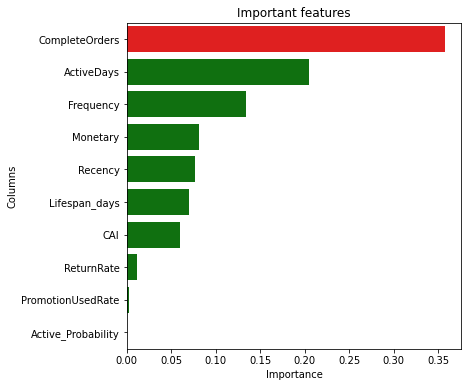

In [ ]:
values = rf_FS.Importance    
idx = rf_FS.Columns
plt.figure(figsize=(6,6))
clrs = ['green' if (x < max(values)) else 'red' for x in values ]
sns.barplot(y=idx,x=values,palette=clrs).set(title='Important features')
plt.show()

In [ ]:
fn=X_res.columns
cn=label_names
# plt.figure(figsize=(12,12))
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (45,8), dpi=800)
tree.plot_tree(rf_model.estimators_[0], feature_names = fn, class_names=cn, filled = True, rounded=True, fontsize=7, impurity=False);
# fig.savefig('rf_individualtree.png')

In [ ]:
y_pred_all = rf_model.predict(X)

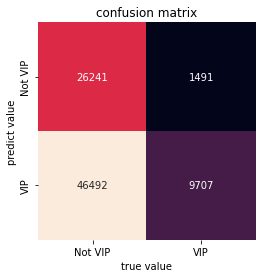

In [ ]:
matric = confusion_matrix(y_pred_all, y)
plt.figure(figsize=(4,4))
sns.heatmap(matric,square=True,annot=True,cbar=False,fmt='d',xticklabels=label_names, yticklabels=label_names)
plt.ylabel("predict value")
plt.xlabel("true value")
plt.title("confusion matrix")
plt.show()

In [ ]:
print("report:\n",classification_report(y_pred_all, y,labels=labels,target_names=label_names))

report:
               precision    recall  f1-score   support

     Not VIP       0.36      0.95      0.52     27732
         VIP       0.87      0.17      0.29     56199

    accuracy                           0.43     83931
   macro avg       0.61      0.56      0.41     83931
weighted avg       0.70      0.43      0.37     83931

